# Análisis Exploratorio de Datos

## Cargar datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/retail_store_inventory.csv")
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

### Conversión en el tipo de dato de algunas columnas

In [ ]:
# Convertir fechas
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
valores_clima = df['Weather Condition'].unique()
print(valores_clima)

['Rainy' 'Sunny' 'Cloudy' 'Snowy']


In [ ]:
# Convertir las condiciones climaticas
weather_map = {'Sunny': 0, 'Rainy': 1, 'Cloudy': 2, 'Snowy': 3}
df['Weather_Code'] = df['Weather Condition'].map(weather_map)

In [ ]:
df['Seasonality_Code'] = df['Seasonality'].astype('category').cat.codes
df["Category Code"] = df["Category"].astype("category").cat.codes
category_dict = dict(enumerate(df["Category"].astype("category").cat.categories))

category_dict

{0: 'Clothing', 1: 'Electronics', 2: 'Furniture', 3: 'Groceries', 4: 'Toys'}

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                73100 non-null  datetime64[ns]
 1   Store ID            73100 non-null  object        
 2   Product ID          73100 non-null  object        
 3   Category            73100 non-null  object        
 4   Region              73100 non-null  object        
 5   Inventory Level     73100 non-null  int64         
 6   Units Sold          73100 non-null  int64         
 7   Units Ordered       73100 non-null  int64         
 8   Demand Forecast     73100 non-null  float64       
 9   Price               73100 non-null  float64       
 10  Discount            73100 non-null  int64         
 11  Weather Condition   73100 non-null  object        
 12  Holiday/Promotion   73100 non-null  int64         
 13  Competitor Pricing  73100 non-null  float64   

### Número de tiendas

In [ ]:
tiendas = df['Store ID'].nunique()
print(f"El dataset contiene {tiendas} tiendas")

El dataset contiene 5 tiendas


### Número de productos

In [ ]:
productos = df['Product ID'].nunique()
print(f"El dataset contiene {productos} tipos de productos")

El dataset contiene 20 tipos de productos


### Cantidad de productos por tienda

In [ ]:
tiendas = df['Store ID'].value_counts()
print(tiendas)

Store ID
S001    14620
S002    14620
S003    14620
S004    14620
S005    14620
Name: count, dtype: int64


### Cantidad de productos por categoría

In [ ]:
categorias = df['Category'].value_counts()
print(categorias)

Category
Furniture      14699
Toys           14643
Clothing       14626
Groceries      14611
Electronics    14521
Name: count, dtype: int64


## Filtrar datos
Filtrando datos para un dataset más pequeño para entrenamiento.

Para que el proyecto no se vuelva inviable, es necesario bajar su complejidad. Esto se puede lograr a través de la selección de un solo producto y entrenar al agente solamente con dicho producto.

A continuación se muestra el análisis de precios para el producto P0001. Esto con el objetivo de entender la distribución de precios y cómo varían según la tienda.

<Figure size 800x500 with 0 Axes>

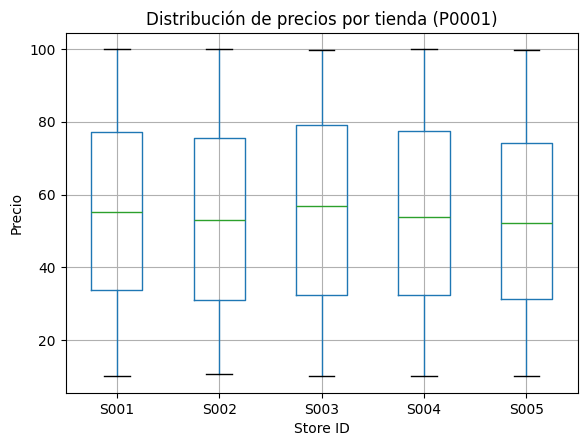

In [ ]:
import os

precios_p0001 = df[df['Product ID'] == 'P0001'][['Date', 'Store ID', 'Price']]


output_path = '../results/plots/eda/' # Para guardar los plots
output_dir = os.path.dirname(output_path)
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(8, 5))
precios_p0001.boxplot(column='Price', by='Store ID')
plt.title("Distribución de precios por tienda (P0001)")
plt.suptitle("")  # quitar título duplicado
plt.xlabel("Store ID")
plt.ylabel("Precio")
plt.savefig(output_path + 'precios_p0001.png')
plt.show()

En el boxplot de arriba, se observa que los precios varían dentro de cada tienda, pero entre tiendas, los precios para P0001 son similares.
Esto es una buena noticia, ya que es posible crear un dataset solo con los datos de P0001 y simulando que todos los P0001 son de la misma tienda. 

Esto nos permite crear un dataset que esencialmente es una sola tienda con una historia muy larga (al concatenar las historias de S001, S002, etc.)

A continuación, se procede a generar el dataset.

In [ ]:
# 1. Filtramos por Producto (mantenemos todas las tiendas para tener más datos)
df_train = df[df['Product ID'] == 'P0001'].copy()

# 2. Ordenamos por Tienda y luego Fecha para que los datos sean secuenciales por tienda
# Esto "simula" una sola tienda con una historia muy larga (al concatenar las historias de S001, S002, etc.)
df_train = df_train.sort_values(['Store ID', 'Date']).reset_index(drop=True)

# Seleccionamos solo las columnas numéricas que verá el agente
cols_para_el_agente = [
    'Inventory Level', 
    'Demand Forecast', 
    'Price', 
    'Discount', 
    'Holiday/Promotion', 
    'Competitor Pricing',
    'Weather_Code',     
    'Seasonality_Code',
]

# 3. Agregamos 'Date' explícitamente y 'Units Sold' (target)
cols_guardar = ['Date'] + cols_para_el_agente + ['Units Sold']

datos_limpios = df_train[cols_guardar]
datos_limpios.to_csv('../data/data_train.csv', index=False)

In [ ]:
df = df[df['Product ID'] == 'P0001'].copy()
stores = {}
for store_id, df_store in df.groupby("Store ID"):
    df_store = df_store.sort_values("Date").reset_index(drop=True)
    stores[store_id] = {
        "data": df_store.to_numpy(),
        "inv_max": df_store["Inventory Level"].max(),
        "forecast_max": df_store["Demand Forecast"].max(),
        "price_max": df_store["Price"].max(),
        "discount_max": df_store["Discount"].max(),
        "competitor_max": df_store["Competitor Pricing"].max(),
        "weather_max": df_store["Weather_Code"].max(),
        "season_max": df_store["Seasonality_Code"].max(),
        "category_max": df_store["Category Code"].max()
    }

In [ ]:
import pickle

with open("../data/stores.pkl", "wb") as f:
    pickle.dump(stores, f)

In [ ]:
df_store.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Weather_Code,Seasonality_Code,Category Code
0,2022-01-01,S005,P0001,Toys,West,111,77,60,83.47,70.33,10,Cloudy,0,70.29,Winter,2,3,4
1,2022-01-01,S005,P0020,Electronics,South,108,101,52,105.92,11.04,10,Snowy,1,9.14,Autumn,3,0,1
2,2022-01-01,S005,P0019,Groceries,South,235,106,124,119.33,88.22,5,Rainy,0,91.16,Spring,1,1,3
3,2022-01-01,S005,P0018,Furniture,West,161,107,66,103.97,48.96,10,Snowy,1,50.03,Spring,3,1,2
4,2022-01-01,S005,P0017,Electronics,East,388,371,98,390.04,98.31,15,Sunny,1,102.42,Spring,0,1,1


In [ ]:
for i, col in enumerate(df_store.columns):
    print(i, col)

0 Date
1 Store ID
2 Product ID
3 Category
4 Region
5 Inventory Level
6 Units Sold
7 Units Ordered
8 Demand Forecast
9 Price
10 Discount
11 Weather Condition
12 Holiday/Promotion
13 Competitor Pricing
14 Seasonality
15 Weather_Code
16 Seasonality_Code
17 Category Code
